In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from random import shuffle

data1 = scipy.io.loadmat("ex7data2.mat")
X = data1["X"]
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [2]:
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    c = np.zeros(m)
    for i in range(m):
        coord = X[i]
        distances = list(map(lambda cent: euclid_sq(cent, coord), centroids))
        c[i] = np.argmin(distances)
    return c

def euclid_sq(centroid, coord):
    # centroid and coord should be same dimension
    # computes euclidean distance squared between centroid and coord 
    n = len(centroid)
    sum = 0
    for i in range(n):
        sum += (coord[i] - centroid[i])**2
    return sum

idx = findClosestCentroids(X, initial_centroids)
print(idx[:3])

[ 0.  2.  1.]


In [3]:
def computeCentroids(X, idx, K):
    m = X.shape[0]
    n = X.shape[1]
    centroids = np.zeros((K,n))
    for i in range(K):
        # get all indices in idx where elements are = i
        pts = X[idx == i]
        mu = np.mean(pts, axis=0)
        centroids[i] = mu
    return centroids

computeCentroids(X, idx, K)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [4]:
def runkMeans(X, initial_centroids, max_iters, plot_progress):
    m, n = X.shape[0], X.shape[1]
    K = len(initial_centroids)
    centroidsLst = [initial_centroids]
    prev_centroidsLst = [initial_centroids] 
    idx = np.zeros(m)
    
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroidsLst[i])
        
        if plot_progress:
            plotProgresskMeans(X, centroidsLst, prev_centroidsLst, idx, K, i)
            prev_centroidsLst.append(centroidsLst[i])
        
        newCentroids = computeCentroids(X, idx, K)
        centroidsLst.append(newCentroids)
    
    if plot_progress:
        plotFinalkMeans(X, centroidsLst[-1], idx, K, max_iters)
    
    return centroidsLst[-1], idx

def plotFinalkMeans(X, centroids, idx, K, max_iters):
    # plotting final k-Means visualization without showing steps
    colors = ["r","y","c"] 
    # different color for each cluster 
    # hard coded to 3 colors for this assignment 
    # but in practice don't do this...
    
    for i in range(K):
        pts = X[idx == i]
        plt.scatter(pts[:,0], pts[:,1], color=colors[i], facecolors='none', s=25)

    plt.scatter(centroids[:,0], centroids[:,1], marker="x", color="k",s=50)
    # want last centroids computed

    plt.title("Final plot after " + str(max_iters) + " iterations")
    plt.show()
    return

def plotProgresskMeans(X, centroidsLst, prev_centroidsLst, idx, K, currIter):
    colors = ["r","y","c"] 
    
    for i in range(K):
        pts = X[idx == i]
        plt.scatter(pts[:,0], pts[:,1], color=colors[i], facecolors='none', s=25)
    
        numCentroids = len(centroidsLst)
        for j in range(numCentroids):
            plt.plot([prev_centroidsLst[j][i][0], centroidsLst[j][i][0]],
                     [prev_centroidsLst[j][i][1], centroidsLst[j][i][1]],
                     marker="x", color="k")
      
    plt.title("Iteration " + str(currIter + 1))
    plt.show()

max_iters = 10
runkMeans(X, initial_centroids, max_iters, False)

(array([[ 1.95399466,  5.02557006],
        [ 3.04367119,  1.01541041],
        [ 6.03366736,  3.00052511]]),
 array([ 0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  

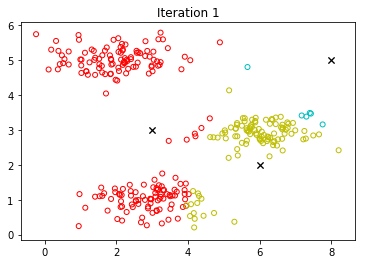

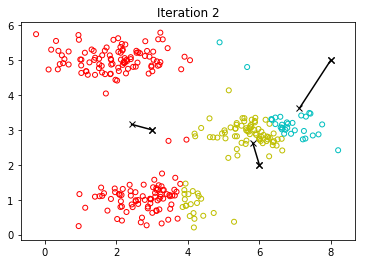

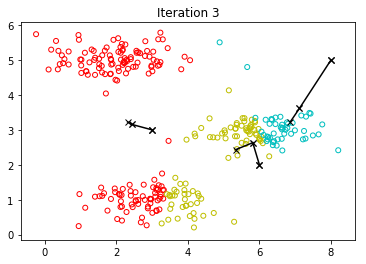

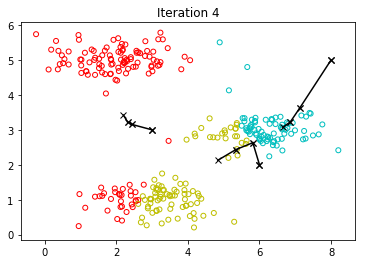

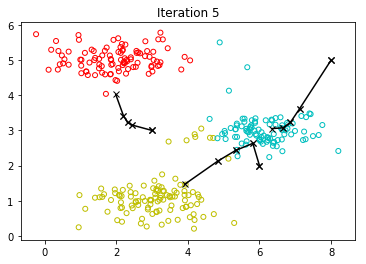

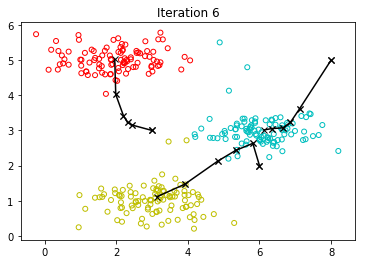

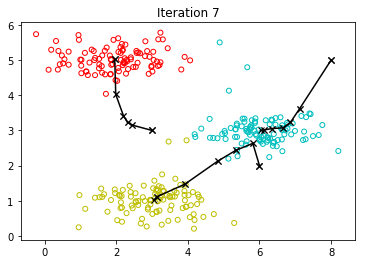

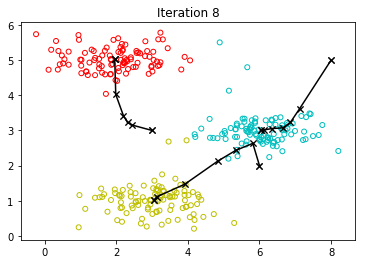

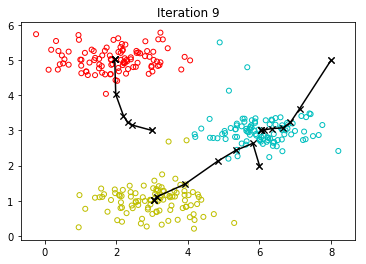

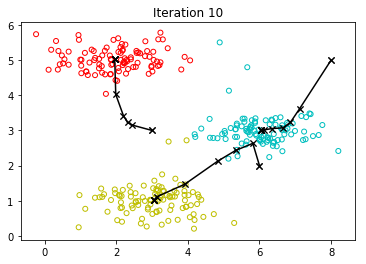

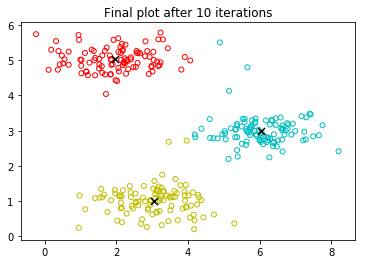

In [5]:
finalCentroid, finalIdx = runkMeans(X, initial_centroids, max_iters, True)

In [6]:
def kMeansInitCentroids(X, K):
    # randomly shuffles elements in X
    # then takes first K elements from random X
    
    np.random.shuffle(X.copy()) # make sure you make a copy!!
    centroids = X[:K]
    return centroids

kMeansInitCentroids(X, K)

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ]])

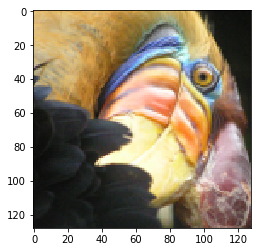

In [7]:
A = scipy.io.loadmat("bird_small.mat")["A"]
plt.imshow(A)
plt.show()

In [8]:
# A is a 3D matrix where first index is the row index,
# second index is column index,
# and third index is a list of [r, g, b] values
img_size = A.shape

print("A shape: ", img_size, "\n")
print("A row 0:\n", A[0], "\n") # represents all the pixels in row 0
print("A row 1, column 0: ", A[1,0]) # represents pixel in row 1, column 0
                                     # -> which has [r,g,b] = [230 193 119] 

A shape:  (128, 128, 3) 

A row 0:
 [[219 180 103]
 [230 185 116]
 [226 186 110]
 [223 185 105]
 [225 179 103]
 [228 187 115]
 [228 185 111]
 [228 187 114]
 [225 183 107]
 [218 172  96]
 [221 180 102]
 [226 187 109]
 [222 182  99]
 [224 184  99]
 [231 188 100]
 [228 182  98]
 [222 176  95]
 [228 187 106]
 [231 191 103]
 [230 182  99]
 [224 182 100]
 [218 186 101]
 [221 185 107]
 [224 184 106]
 [224 180 102]
 [223 182 105]
 [222 181  99]
 [222 175  91]
 [223 176  97]
 [227 183 116]
 [224 188 122]
 [229 193 126]
 [227 190 119]
 [229 189 115]
 [239 194 113]
 [234 192 116]
 [227 187 105]
 [231 192 104]
 [230 187 108]
 [220 183  97]
 [225 175  88]
 [231 178  93]
 [227 178  97]
 [232 179  95]
 [225 171  90]
 [224 170  90]
 [220 170  88]
 [222 162  84]
 [209 159  76]
 [211 166  76]
 [209 162  84]
 [205 159  83]
 [208 160  78]
 [203 158  76]
 [199 157  81]
 [201 159  77]
 [207 155  72]
 [206 150  68]
 [205 153  68]
 [209 163  73]
 [214 165  82]
 [200 157  70]
 [199 158  71]
 [200 162  78]
 [19

In [9]:
A = A / 255 # normalize
X = np.reshape(A, (img_size[0] * img_size[1], 3))
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)

centroids, idx = runkMeans(X, initial_centroids, max_iters, False)

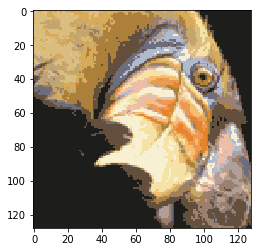

In [10]:
# note that we have to call findClosestCentroids again. This is because
# in our runkMeans for loop, we don't update idx after we find our final
# centroids. That is idx still represents indicies for the PREVIOUS set of
# centroids prior to our final returned centroids.
idx = findClosestCentroids(X, centroids)

X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)
plt.show()